In [24]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np


In [5]:
sim = rebound.Simulation()
#sim.G = 4*np.pi**2 julian year is 365.25, while actual is 365.256
sim.G = 39.4769264214
sim.units = ['AU', 'yr', 'Msun']

sim.add(["Sun","Mercury","Venus","Earth","Mars"])

sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne

sim.add(["Jupiter","Saturn","Uranus","Neptune"])
sim.move_to_com()
sim.save("checkpoint.bin")


Searching NASA Horizons for 'Sun'... 

KeyboardInterrupt: 

In [25]:

sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Feb 16 2019 13:25:19
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [26]:
sim.status()
#widget = sim.getWidget()
#display(widget)
#sim.integrate(1000)




---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Feb 16 2019 13:25:19
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [27]:

Noutputs = 10000
year = 2500 # One year in units where G=1
times = np.linspace(0.,year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

In [28]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
    sim.integrate(time)
    x[0][i] = ps[3].x   # Earth This stores the data which allows us to plot it later
    y[0][i] = ps[3].y
    z[0][i] = ps[3].z
    x[1][i] = ps[5].x   # Cruithne
    y[1][i] = ps[5].y
    z[1][i] = ps[5].z


0


<IPython.core.display.Javascript object>


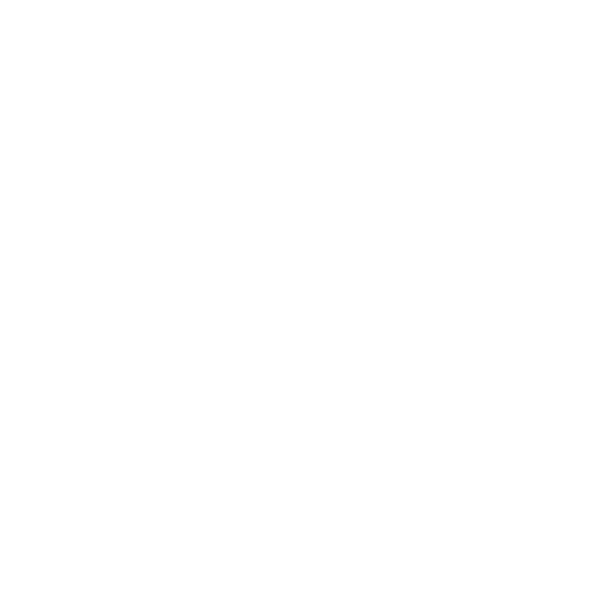

<IPython.core.display.Javascript object>


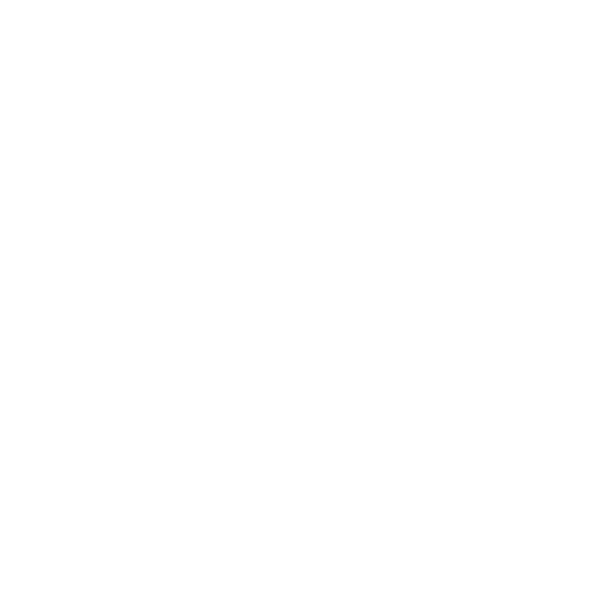

<IPython.core.display.Javascript object>


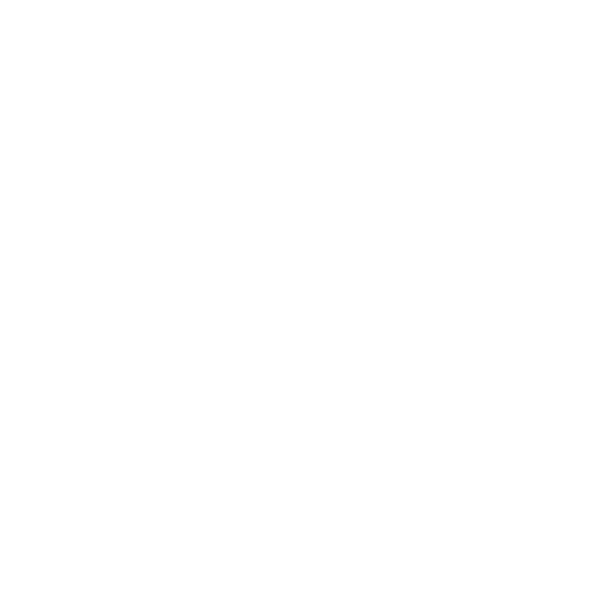

In [29]:

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

fig2 = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(y[0], z[0]);
plt.plot(y[1], z[1]);

fig3 = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x[0], z[0]);
plt.plot(x[1], z[1]);

<IPython.core.display.Javascript object>


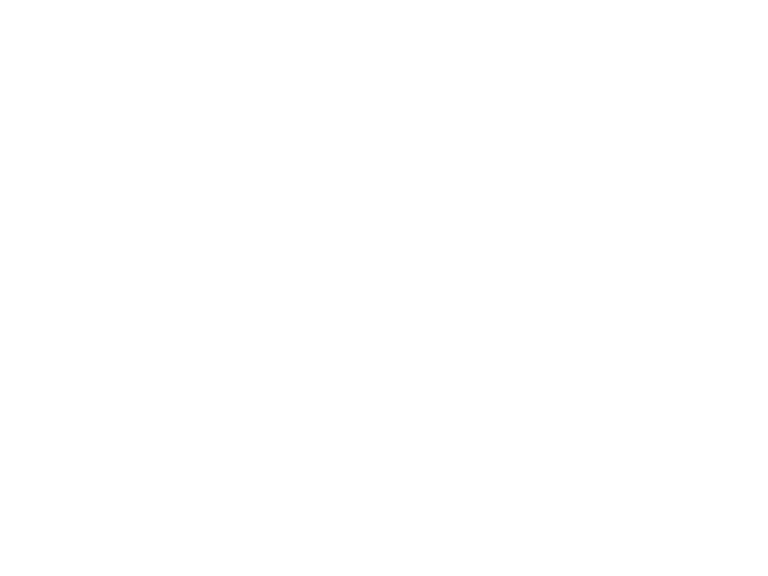

In [30]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
# fig.set_figheight(10)
# fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
#ax = fig.gca(projection='3d',s=500)
# theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# z = np.linspace(-2, 2, 100)
# r = z**2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
ax.plot(x[0], y[0], z[0], label='earth')
ax.plot(x[1], y[1], z[1], label='earth')
ax.legend()
fig.savefig("myfig.png", dpi=200)

plt.show()

<IPython.core.display.Javascript object>


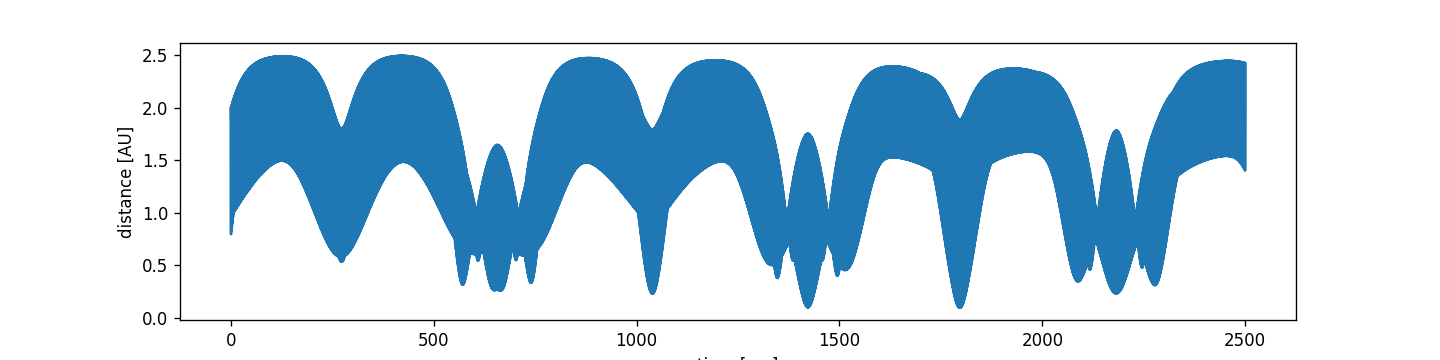

Minimum distance (0.097393 AU) occured at time: 1796.429643 years.


In [31]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
k = 100000+1000*7
plt.plot(times, distance);
closeencountertime = times[np.argmin(distance)]
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

In [ ]:
sim.t = 0
sim.move_to_com()
for time in np.linspace(0,10.,200):
    #print(time)
    sim.integrate(time)
    #print(sim.calculate_energy())
    fig = rebound.OrbitPlot(sim,color=True,unitlabel="[AU]",lim=2.)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)